In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Лабораторная работа 2. Цифровая обработка изображений.

В этой работе рассматриваются различные виды цифровой обработки изображений.

Цель лабораторной работы:

# 1. OpenCV
Работать с изображениями удобнее всего при помощи opencv-python. OpenCV -- реализация библиотеки алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения. opencv-python является оберткой реализации Оригинальной библиотеки OpenCV, написанной на языке C++, что делает его таким же быстрым. Все структуры массивов opencv-python (далее просто OpenCV) преобразуются в массивы Numpy и из них. Это также облегчает интеграцию с другими библиотеками, использующими Numpy, такими как SciPy и Matplotlib.

OpenCV предлагает широкий набор алгоритмов и состоит из следующих модулей:
- core -- основная функциональность. Включает в себя базовые структуры, вычисления (математические функции, генераторы случайных чисел) и линейную алгебру и пр.;
- imgproc -- обработка изображений (фильтрация, геометрические преобразования, преобразование цветовых пространств и т. д.);
- imgcodecs -- чтение и запись файлов изображений;
- videoio -- чтение и запись видео или последовательности изображений;
- highgui -- создание простого пользовательского интерфейса и обработка событий мыши и клавиатуры;
- video -- обработка видео;
- calib3d -- калибровка камер и 3D реконструкция;
- features2d -- работа с особыми точками;
- objdetect -- обнаружение объектов;
- dnn -- глубокие нейронные сети;
- ml -- машинное обучение;
- stitching -- склейка изображений;
и других.

Документацию по OpenCV-Python v4.5.5 можно найти [здесь](https://docs.opencv.org/4.5.5/d6/d00/tutorial_py_root.html)
Документация по OpenCV разных версий можно найти [здесь](https://docs.opencv.org/)

## 1.1 Установка и подключение opencv-python
установку пакета opencv-python можно осуществить в терминале командой:
pip3 install opencv-python

Подключение библиотеки:

In [2]:
import numpy as np
import cv2 as cv

## 1.2. Загрузка и просмотр изображений

In [3]:
image = cv.imread('hal.jpg')
cv.imshow("Image", image)
cv.waitKey(0)
cv.destroyAllWindows()

Без операций cv.waitKey(0) и cv.destroyAllWindows() окно может закрываться не корректно.

Вынесем этот код в функцию show_image() и display_image() в файл "utility/util.py". Подключим созданные файлы к текущему коду:

In [4]:
from utility import util

Еще одним способом отображения изображений является использование библиотеки matplotlib подключим ее и выведем тестовое изображение:

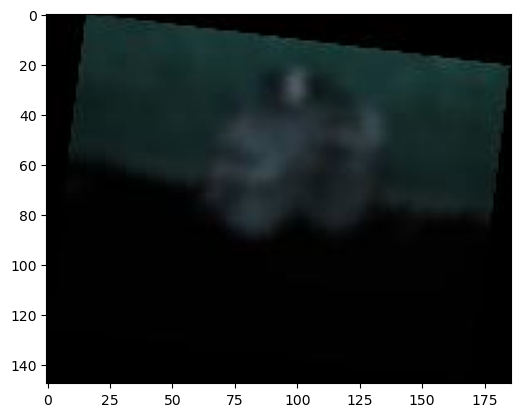

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

#%matplotlib inline позволяет выводить графики matplotlib в Jupyter
plt.imshow(image)

По умолчанию, при чтении файла изображения методом cv.imread() изображение находится в цветовом пространстве не RGB (как все привыкли), а BGR, т.е. цвета идут в другом порядке. Эта особенность является причиной не корректного вывода изображения при помощи matplotlib, т.к. он выводит изображение в цветовом пространстве RGB.
Чтобы поменять цветовое пространство на RGB можно воспользоваться методом:
`rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`

Проверим этот факт загрузив изображение с пикселями синего цвета:

In [32]:
blue_image = util.display_image('blue_image.png')

Выведем пиксел с координатами (0,0) изображения в виде массива NumPy:

In [35]:
blue_image[0, 0, :]

array([255,   0,   0], dtype=uint8)

Действительно, пиксель имеют максимальную яркость только по первому каналу. Значит первый канал хранит синий цвет.
Преобразуем цветовое пространство BGR в RGB:

In [34]:
rgb_blue_image = cv.cvtColor(blue_image, cv.COLOR_BGR2RGB)
rgb_blue_image[0, 0, :]

array([  0,   0, 255], dtype=uint8)

Проделаем то же самое для тестового изображения:

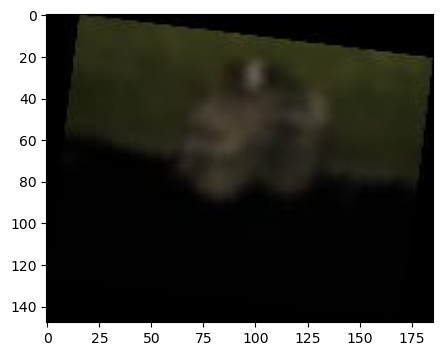

In [36]:
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## 1.3. Простые операции с изображениями

### 1.3.1 Кадрирование или ROI
**Кадрирование** -- усечение изображения с целью выделения объекта интереса.
**ROI** (Region Of Interest, объект интереса) -- границы изображения объекта интереса.
Поскольку цветное изображение является 3-х мерным массивом NumPy, то кадрировать (т.е. обрезать) такое изображение можно при помощи срезов:

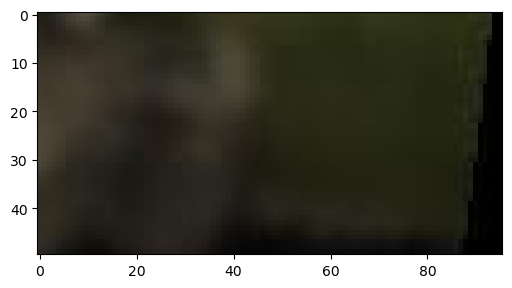

In [46]:
ROI = (90, 33, 110, 50)  #(x0, y0, height, width)
cropped_image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
plt.imshow(cropped_image)

### 1.3.2 Изменение размера изображения



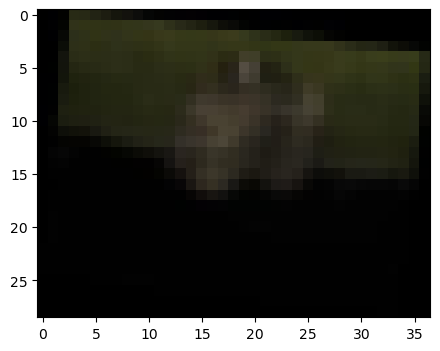

In [37]:
scale_percent = 20  # Процент от изначального размера
width = int(rgb_image.shape[1] * scale_percent / 100)
height = int(rgb_image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv.resize(rgb_image, dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_image)

### 1.3.3 Поворот изображения

Вращение изображения – это одно из аффинных преобразований. Его удобно определять матрицей перехода. Подробнее  стоит почитать в статье [Матрица перехода — Википедия (wikipedia.org)](https://ru.wikipedia.org/wiki/Матрица_перехода). В случае вращения матрица перехода вычисляется функцией cv.getRotationMatrix2D(center, angle, scale), где center и angle – координаты центра и угол вращения, а scale – коэффициент масштабирования. Справку по вращению изображений и другим геометрическим трансформациям можно посмотреть в [документации](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html)

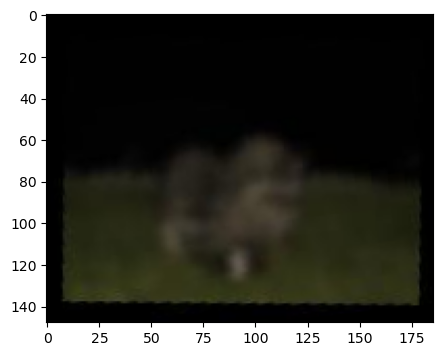

In [23]:
(h, w, d) = rgb_image.shape
angle = 186.5
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
rotated = cv.warpAffine(rgb_image, M, (w, h))
plt.imshow(rotated)

### 1.3.4 Рисование примитивов на изображении:
- cv.line(image, startPoint, endPoint, rgb_color, thickness)
- cv.rectangle(image, topLeft, bottomRight, rgb_color, thickness)
- cv.circle(image, center, radius, rgb_color, thickness)
- cv.ellipse(image, center, axes, angle, startAngle, endAngle, rgb_color, thickness)

где:
- image -- изображение
- startPoint, endPoint -- координаты начальной и конечной точек;
- rgb_color -- код цвета в формате rgb координат (red, green, blue). red, green, blue ∈ [0, 255];
- thickness -- толщина линии в пикселях;
- center -- координаты центра окружности или эллипса;
- topLeft, bottomRight -- координаты верхней левой и нижней правой точек прямоугольника, соответственно.

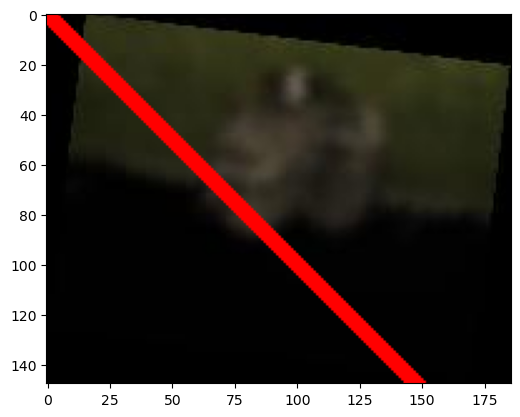

In [19]:
copy_image = rgb_image.copy()

# рисование линии
cv.line(copy_image, (0, 0), (511, 511), (255, 0, 0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv.rectangle(copy_image, (384, 0), (510, 128), (0, 255, 0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv.circle(copy_image, (447, 63), 63, (0, 0, 255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv.ellipse(copy_image, (256, 256), (100, 50), -45, 0, 180, (255, 0, 0), -1)
# => Red wide down-half ellipse

plt.imshow(copy_image)

###1.3.5 Наложение текста на изображение

In [ ]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
copy_image = rgb_image.copy()
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(rgb_image, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 10, cv.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(rgb_image)

## 1.4 Цветовые модели

Цветные цифровые изображения представляют собой совокупность трех цветовых плоскостей, каждая из которых характеризует одну независимую составляющую цвета, представленную в том же формате, что и обычное 8-битное полутоновое изображение.

### 1.4.1 Цветовая модель RGB

RGB (Red, Green, Blue - красный, зеленый, синий) - цветовая модель, описывающая способ кодирования цвета для цветовоспроизведения с помощью трёх цветов, которые принято называть основными. Выбор основных цветов обусловлен особенностями физиологии восприятия цвета сетчаткой человеческого глаза. Сетчатка глаза имеет три вида рецепторов (колбочек), ответственных за цветное зрение. Можно считать, что каждый вид колбочек даёт свой отклик на определённую длину волны видимого спектра.
 Система координат RGB - куб с началом отсчета ⟨0,0,0⟩, соответствующим черному цвету. Максимальное значение RGB - ⟨255,255,255⟩ соответствует белому цвету.

<img src="../content/RGB_color_cube.png" width="800"/>

В модели RGB не разделены яркостная и оттеночная компоненты цвета, здесь легко указать яркости для одного из основных цветов, но затруднительно указать оттенок с требуемым цветовым тоном (например, телесным) и насыщенностью.

### 1.4.2 Цветовые модели HSV и HSI

 Цветовая модель HSV (Hue, Saturation, Value - цветовой тон, насыщенность, мера яркости) - модель, ориентированная на человека и обеспечивающая возможность явного задания требуемого оттенка цвета. Среди прочих используемых в настоящее время моделей, эта модель отражает физические свойства цвета и наиболее точно соответствует способу восприятия цвета человеческим глазом.
 Оттенок цвета (H) - это длина световой волны, отраженной или прошедшей через объект. Насыщенность (S) характеризует степень, уровень выражения оттенка цвета. Она определяет соотношение серого цвета и выбранного оттенка и выражается в долях от 0 (серый) до 1 (полностью насыщенный). Мера яркости (V) характеризует интенсивность цвета, поэтому она измеряется в диапазоне от 0 (черный) до 1 (белый). При увеличении яркости цвет становится более светлым (белым). Составляющая V является нелинейной, что близко соответствует восприятию человеком светлых и темных цветов.

<img src="../content/HSV-color-visualization.png" width="300"/>

С точки зрения обработки изображений цветовое пространство удобно тем, что позволяет непосредственно оперировать интенсивностью (яркостью) и цветом (тоном) пикселя.

Существует также цветовая модель HSL (hue, saturation, lightness) или HSI (hue, saturation, intensity) , которая строится по такому же принципу, что и модель HSV, но отличающаяся кодированием цвета пикселя и, соответственно, формулами преобразования из цветового пространства RGB в HSI/HSV и обратно.

**HSV vs. HSL**
Представление **HSL** моделирует то, как различные краски смешиваются вместе, чтобы создать цвет в реальном мире. Полностью насыщенные цвета размещаются вокруг круга при значении светлоты 1/2, при этом значение светлоты 0 или 1 соответствует полностью черному или белому соответственно. Между тем, представление HSV моделирует, как цвета появляются при свете. Разница между HSL и HSV заключается в том, что цвет с максимальной светлотой в HSL является чисто белым, но цвет с максимальным значением / яркостью в HSV аналогичен освещению белого света на цветном объекте (например, яркое белый свет на красный объект заставляет объект по-прежнему казаться красным, просто ярче и интенсивнее, в то время как тусклый свет на красный объект заставляет объект казаться темнее и менее ярким).

Наглядно разницу между HSV и HSL можно увидеть на изображениях визуализации цветовых пространств:

<img src="../content/HSL vs HSV.png" width="600"/>

Подробнее про различия HSL и HSV моделей можно прочитать [здесь](https://en.wikipedia.org/wiki/HSL_and_HSV)

Алгоритмы преобразования из RGB в HSV и наоборот можно посмотреть [здесь](https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C))

Алгоритмы преобразования из RGB в HSL и наоборот можно посмотеть [здесь](https://ru.wikipedia.org/wiki/HSL)

**В OpenCV есть готовый метод преобразования изображений из одних цветовых моделей в другие:**
`cv.cvtColor(image, ColorConversionType)`
Где ColorConversionType - тип преобразования из одной цветовой модели в другую:
cv.COLOR_BGR2RGB - преобразование из BGR в RGB
cv.COLOR_RGB2BGR - преобразование из RGB в BGR
cv.COLOR_BGR2GRAY - преобразование из BGR в GRAY
cv.COLOR_RGB2GRAY - преобразование из RGB в GRAY
cv.COLOR_GRAY2RGB - преобразование из GRA в RGB
cv.COLOR_GRAY2BGR - преобразование из GRA в BGR
cv.COLOR_HSV2RGB - преобразование из HSV в RGB
cv.COLOR_HLS2RGB - преобразование из HLS в RGB
cv.COLOR_RGB2HSV - преобразование из RGB в HSV
cv.COLOR_RGB2HLS - преобразование из RGB в HLS

Полный список типов конвертации можно посмотреть в [документации](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)


# 2. Гистограммная обработка.

## 2.1 Гистограммная обработка изображений.

### 2.1.1 Построение и визуализация гистограммы.
Гистограмма характеризует частоту встречаемости на изображении пикселей одинаковой яркости и позволяет анализировать яркостную составляющую изображения. Гистограмма позволяет оценить и необходимым образом изменить яркость изображения, его контраст, площадь изображения, которую занимают светлые, темные и другие яркостные элементы, и, наконец, определить, где на плоскости изображения находятся отдельные области (объекты), соответствующие тем или иным диапазонам значений яркости.

Документацию по гистограммам в OpenCV читайте [здесь](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html)


In [ ]:
%reset

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util

# Изменим стандартный размер графиков matplotlib
plt.rcParams["figure.figsize"] = [6, 4]

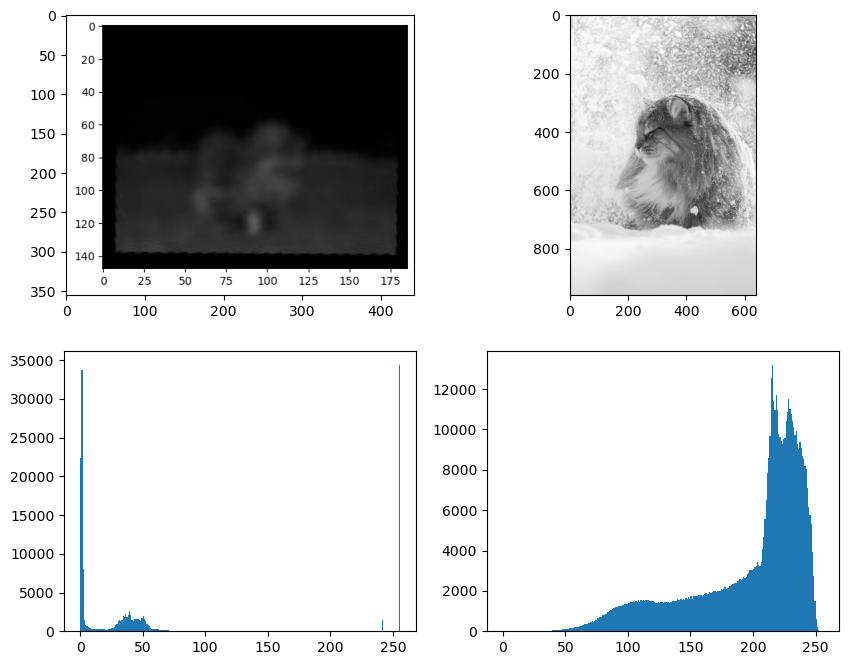

In [24]:
image1 = cv.imread('test_fixed.png')
image2 = cv.imread('winter_cat.png')
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

channels = [0]
histSize = [256]
range = [0, 256]

hist1 = cv.calcHist([gray_image1], channels, None, histSize, range)
hist2 = cv.calcHist([gray_image2], channels, None, histSize, range)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(gray_image2, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range)
plt.subplot(gs[3])
plt.hist(gray_image2.reshape(-1), 256, range)
plt.show()


Помните, что эта гистограмма рисуется для изображения в градациях серого, а не для цветного изображения. Левая область гистограммы показывает количество более темных пикселей в изображении, а правая область показывает количество более ярких пикселей. Из первой гистограммы можно видеть, что яркость пикселей распределена достаточно равномерно, в отличие от гистограммы второго изображения, где преобладают яркие пиксели.

Другие способы визуализации гистограмм:
1. С использованием Matplotlib

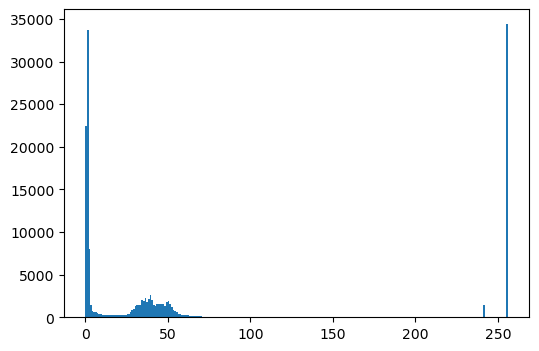

In [25]:
plt.hist(gray_image1.reshape(-1), 256, range)
plt.show()

2. С использованием OpenCV можно визуализировать гистограммы по каналам.

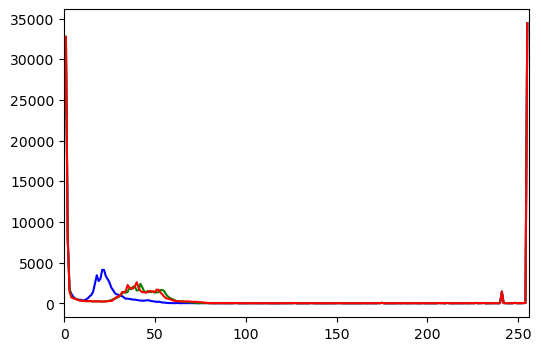

In [26]:
histSize = [256]
range = [0, 256]


def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col)
        plt.xlim(range)


plot_rgb_hist(image1, histSize, range)
plt.show()

По графику видно, что красный цвет преобладает.

### 2.1.2 Яркостные (гистограммные) преобразования
Яркостные преобразования цифровых изображений часто называют *гистограммными*, так как при этом, во-первых, изменяется гистограмма изображения, во-вторых, вид функции преобразования (параметры преобразования) часто определяются *адаптивно*, на основании ранее собранной гистограммы исходного изображения.
В случае дискретных цифровых изображений функция отображения яркости принимает вид так называемой *таблицы отображения яркости* ***LUT (Look-Up-Table, просмотровой таблицы).*** Гистограммная обработка изображения при помощи таблицы отображения яркости осуществляется следующим образом:
$$
{\rm Im}[i,j] = {\rm LUT[Im}[i,j]],
$$
где Im$[i,j]$ -  пиксел изображения с координатами $\langle i,j \rangle$, а LUT -  целочисленный массив размера $256$ элементов для $8$-битного изображения или длиной $65 536$ элементов для $16$-битного изображения.
При этом LUT может задаваться:
- произвольной таблицей отображения, формируемой пользователем непосредственно;
- некоторой математической функцией, выбранной из заданного набора функций;
- адаптивно по гистограмме данного анализируемого изображения.


Рассмотрим несколько примеров, но сначала подготовим тестовое изображение, но слегка ухудшенное (увеличена яркость и уменьшена контрастность).

#### 2.1.2.1 Инверсия
Простейшим примером гистограммной обработки изображений является *инвертирование яркости*, определяемое зависимостью вида
$$
{\rm LUT}[i] = 255 - i.
$$
В результате инвертирования изображения получается его *негатив*. При этом темные области становятся светлыми, и наоборот.


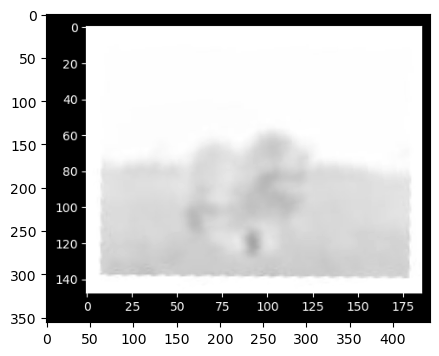

In [27]:
lut = lambda i: 255 - i
invert_image = lut(gray_image1)
plt.imshow(invert_image, cmap='gray')

#### 2.1.2.2 Гамма-коррекция
Гамма-коррекция --  степенной закон вида
$$
{\rm LUT}[i] = r(i)^{\gamma },
$$
где $r$ -  коэффициент контраста, а $\gamma $ -  степень преобразования.
Такие преобразования известны в области аналогового телевидения как процедура $\it{гамма-коррекции}$. Легко увидеть, что изменяя параметр $\gamma $, мы можем получать LUT различного типа. При $\gamma =1$ преобразование будет линейным, при $\gamma < 1$ предпочтение будет отдаваться более светлым цветам (на них придется большая часть диапазона), при $\gamma > 1$ предпочтение будет отдаваться более темным цветам. Такие преобразования используются для "выравнивания" яркости изображений, получаемых на электронно-лучевых трубках (ЭЛТ).

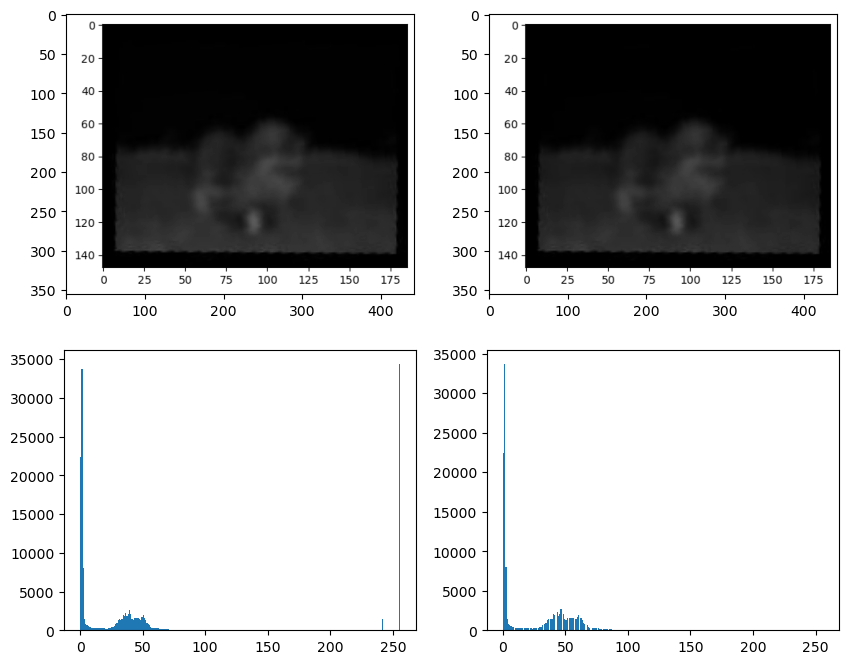

In [28]:
gamma = 1.05
lut = lambda i: i ** gamma
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range)
plt.show()

#### 2.1.2.3 Адаптивная коррекция

Рассмотрим теперь простейший способ *адаптивной* (то есть не наперед заданной, а
зависящей от данного конкретного изображения) гистограммной обработки.

##### 2.1.2.3.1 Яркостная нормализация
Начнем с линейной адаптивной процедуры, называемой *яркостной нормализацией* изображения и
описываемой следующей математической зависимостью:
$$
{\rm LUT}[i] = 255 \cdot  \frac {i - {I_{\min}}} {I_{\max} - I_{\min}}.
$$
$I_{\min} = \min\limits_{x,y} \textrm{Im} [x,y]$, $I_{\max} = \max\limits_{x, y} \textrm{Im} [x,y]$.
Значения $I_{\min}$ и $I_{\max}$ определяются как минимальный и максимальный номера ненулевых ячеек гистограммы Hist(Im).
Данное преобразование равномерно "растягивает" диапазон яркостей
[$I_{\min}, I_{\max}$], присутствующих на исходном изображении Im,
на максимально возможный диапазон $[0, 255]$. Это способствует максимально
возможному улучшению контраста изображения без потери каких-либо различий
элементов яркости исходного изображения.


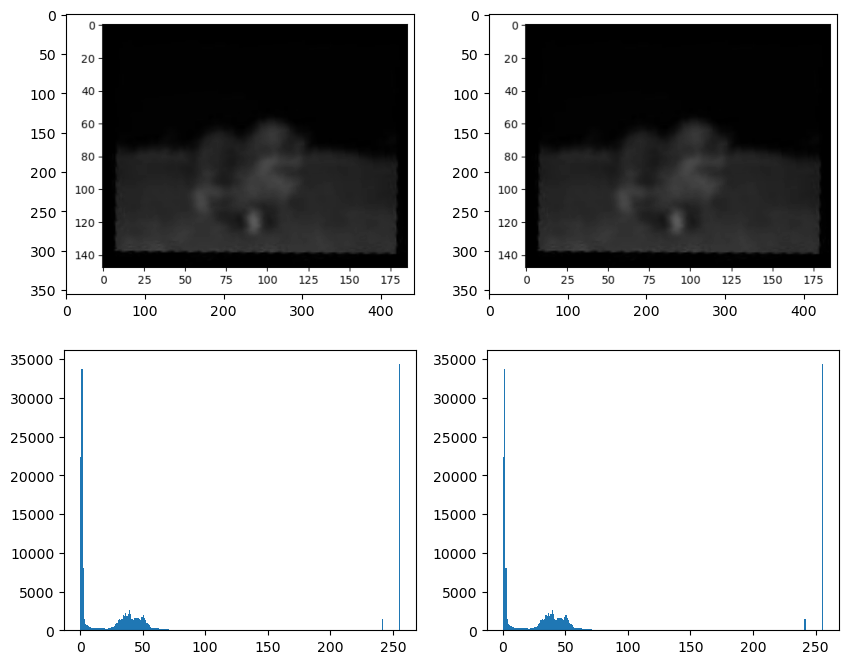

In [29]:
lut = lambda i: 255 * ((i - np.min(i)) / (np.max(i) - np.min(i)))
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range)
plt.show()

##### 2.1.2.3.2 Эквализация изображения

Другой популярной процедурой адаптивной гистограммной обработки изображения является *эквализация* изображения. Эквализация также отображает реальный яркостный диапазон данного изображения (от минимального до максимального значения интенсивности) на диапазон [0, 255]. При этом обеспечивается "выравнивание" числа пикселов изображения, имеющих различные значения яркости. Математическая форма данного преобразования имеет вид
$$
{\rm LUT}[i] = 255 \cdot  \frac{\sum\limits_{j=1}^i \textrm{Hist}[j]} {\sum\limits_{j=1}^{255} \textrm{Hist}[j]},
$$
В тех случаях, когда в диапазоне [Imin,Imax] более или менее равномерно присутствуют все градации, визуальный эффект от эквализации трудно отличить от эффекта нормализации. Однако в случае, когда значительная часть градаций яркости отсутствует, эквализация позволяет более равномерно использовать диапазон [0,255] для более контрастного отображения присутствующих на изображении градаций. Визуально это выглядит как "проявление" большего количества ранее не заметных на изображении деталей и контуров.

**Задание: реализуйте данный вид эквализации самостоятельно**

In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_equalization(image):
    # Применение эквализации гистограммы с использованием функции equalizeHist() из библиотеки OpenCV
    equalized_image = cv2.equalizeHist(image)
    
    return equalized_image



# Выполнение эквализации изображения
result_image = image_equalization(gray_image)

# Отображение исходного и эквализованного изображений, а также их гистограмм
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')
plt.title('Исходное изображение')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.title('Эквализованное изображение')
plt.subplot(gs[2])
plt.hist(gray_image.reshape(-1), 256, range=(0, 255))
plt.title('Гистограмма исходного изображения')
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range=(0, 255))
plt.title('Гистограмма эквализованного изображения')
plt.show()


NameError: name 'gray_image' is not defined

### 2.1.3 OpenCV CLAHE (Contrast Limited Adaptive Histogram Equalization)

В OpenCV есть встроенный метод CLAHE коррекции (выравнивания) гистограмм.

Посмотреть пособие по выравниванию гистограмм в OpenCV можно [здесь](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html)

Рассмотрим пример применения метода CLAHE (Contrast Limited Adaptive Histogram Equalization):

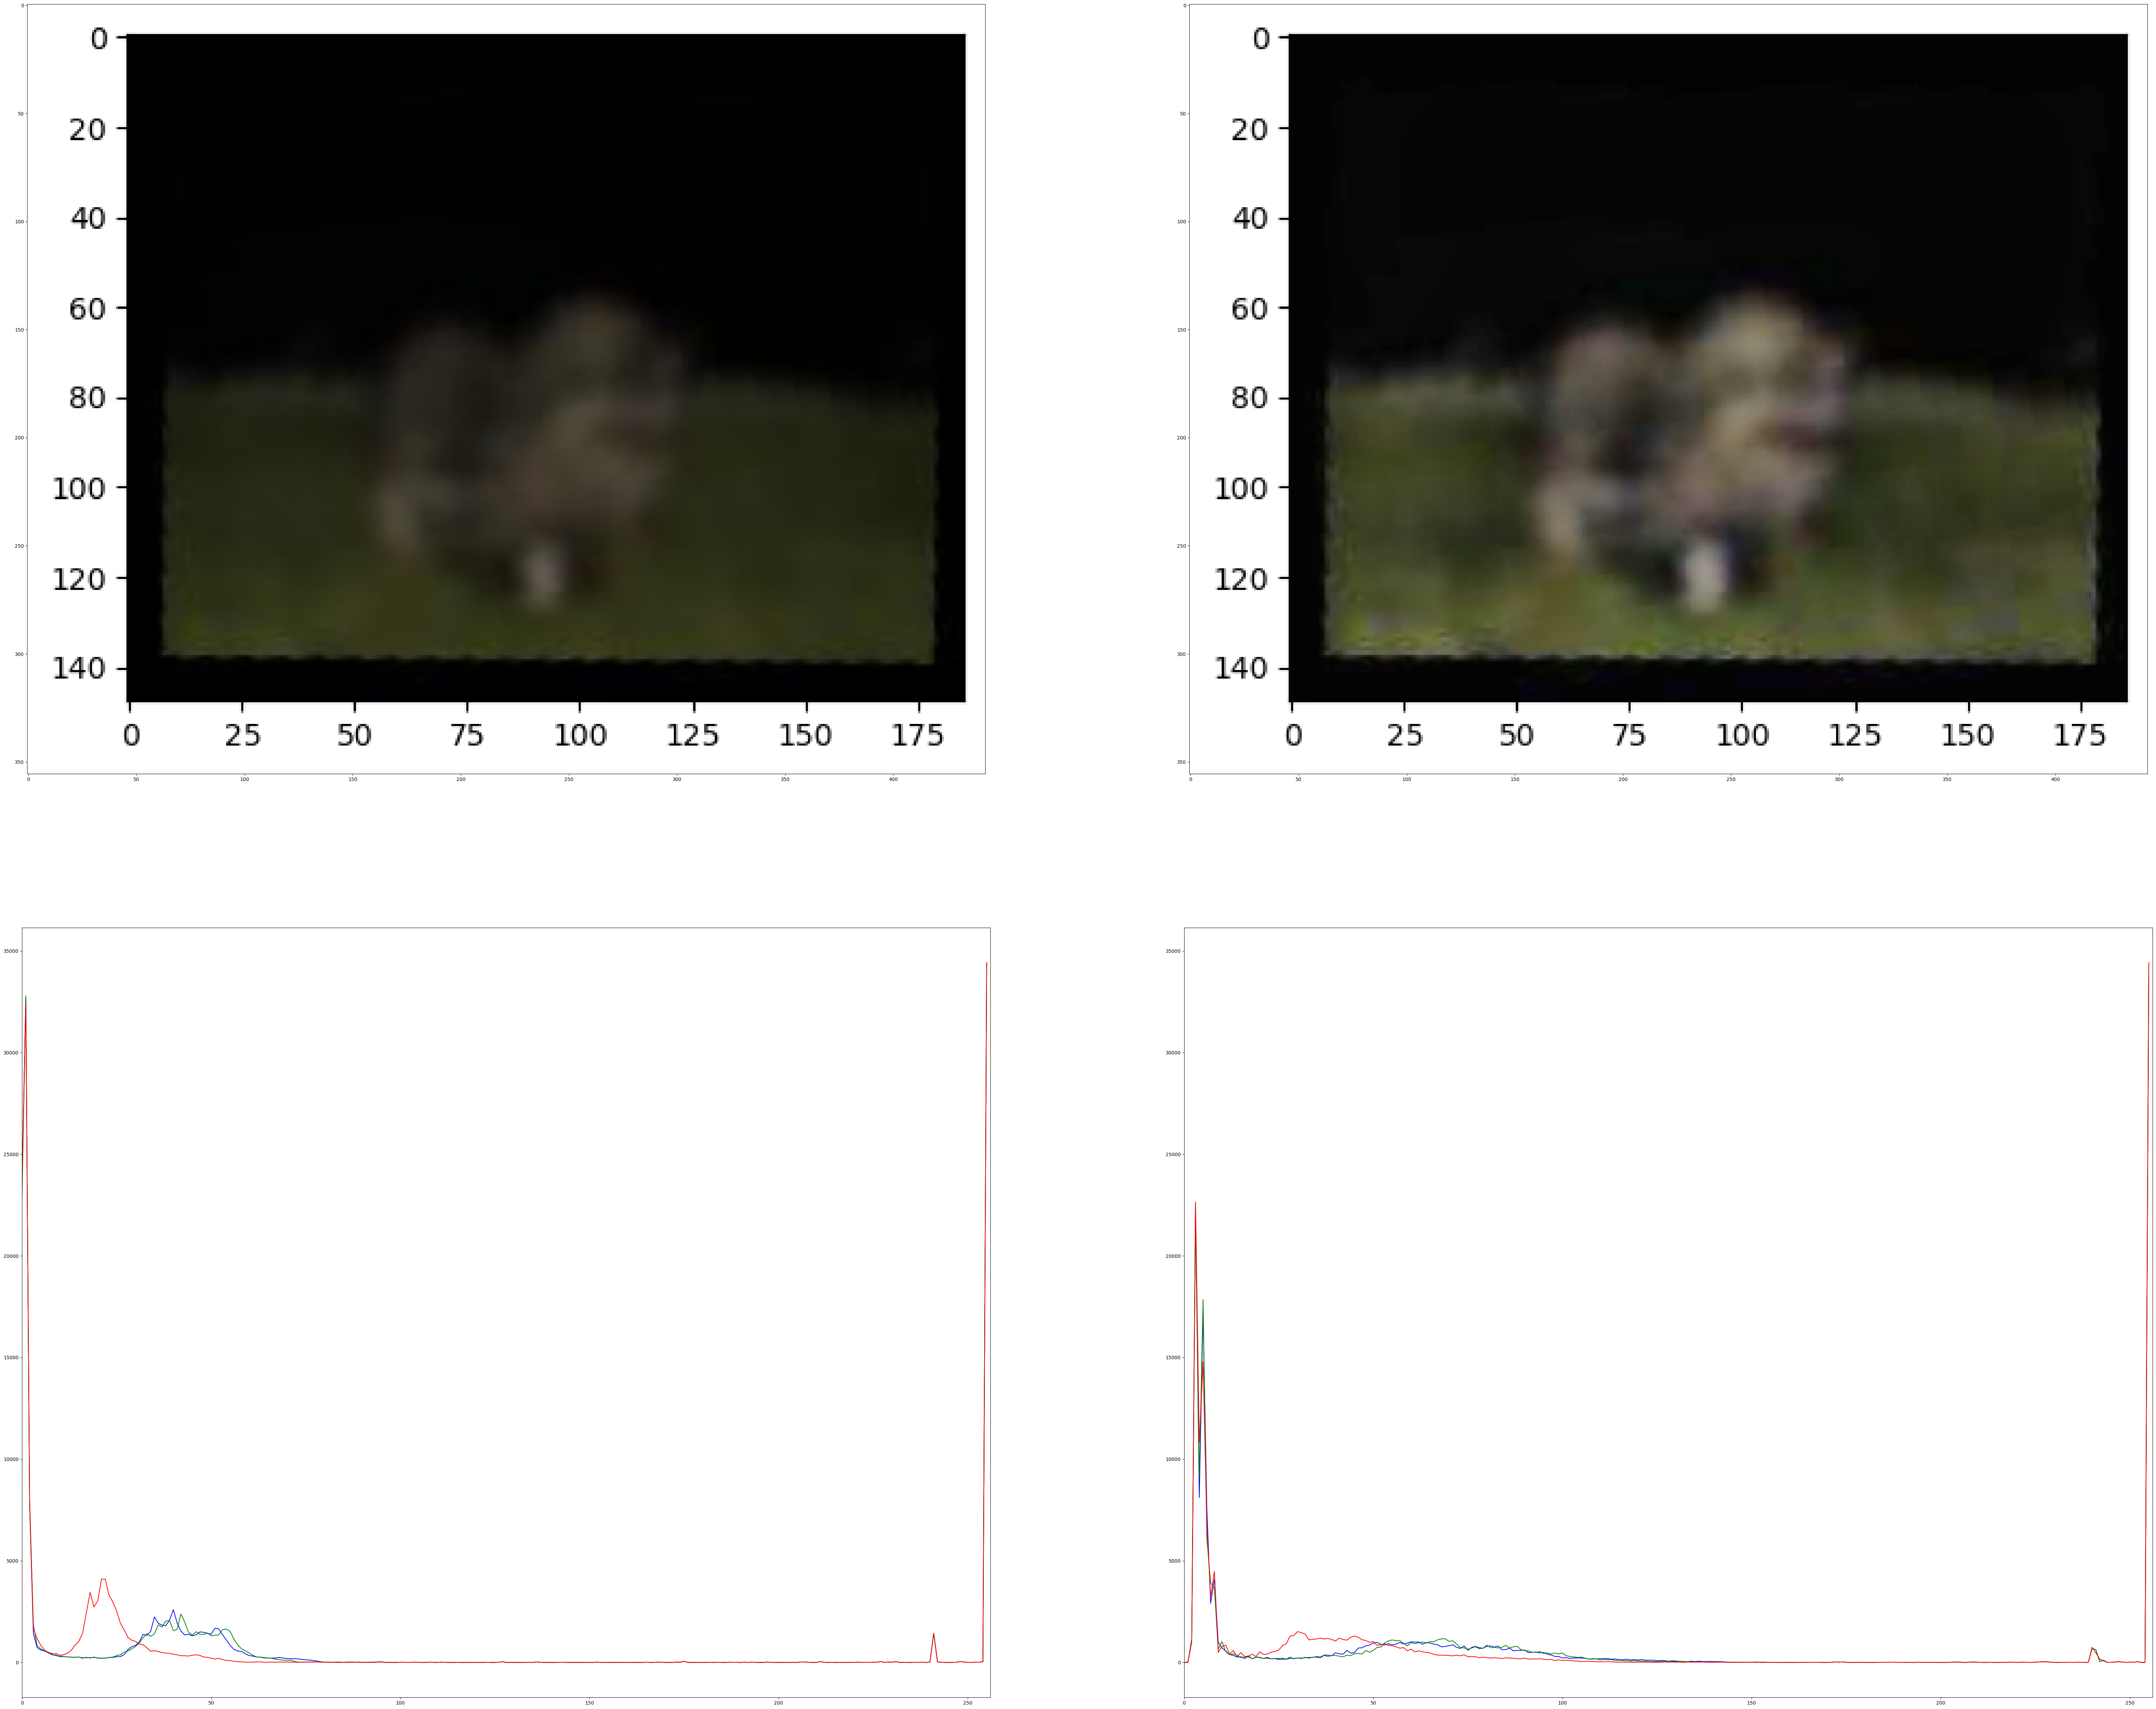

In [30]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

rgb_result_image = np.empty(np.shape(rgb_image1), np.uint8)
rgb_result_image[:, :, 0] = clahe.apply(rgb_image1[:, :, 0])
rgb_result_image[:, :, 1] = clahe.apply(rgb_image1[:, :, 1])
rgb_result_image[:, :, 2] = clahe.apply(rgb_image1[:, :, 2])

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(80, 64))
plt.subplot(gs[0])
plt.imshow(rgb_image1)
plt.subplot(gs[1])

plt.imshow(rgb_result_image)

plt.subplot(gs[2])
plot_rgb_hist(rgb_image1, histSize, range)
plt.subplot(gs[3])
plot_rgb_hist(rgb_result_image, histSize, range)

plt.show()





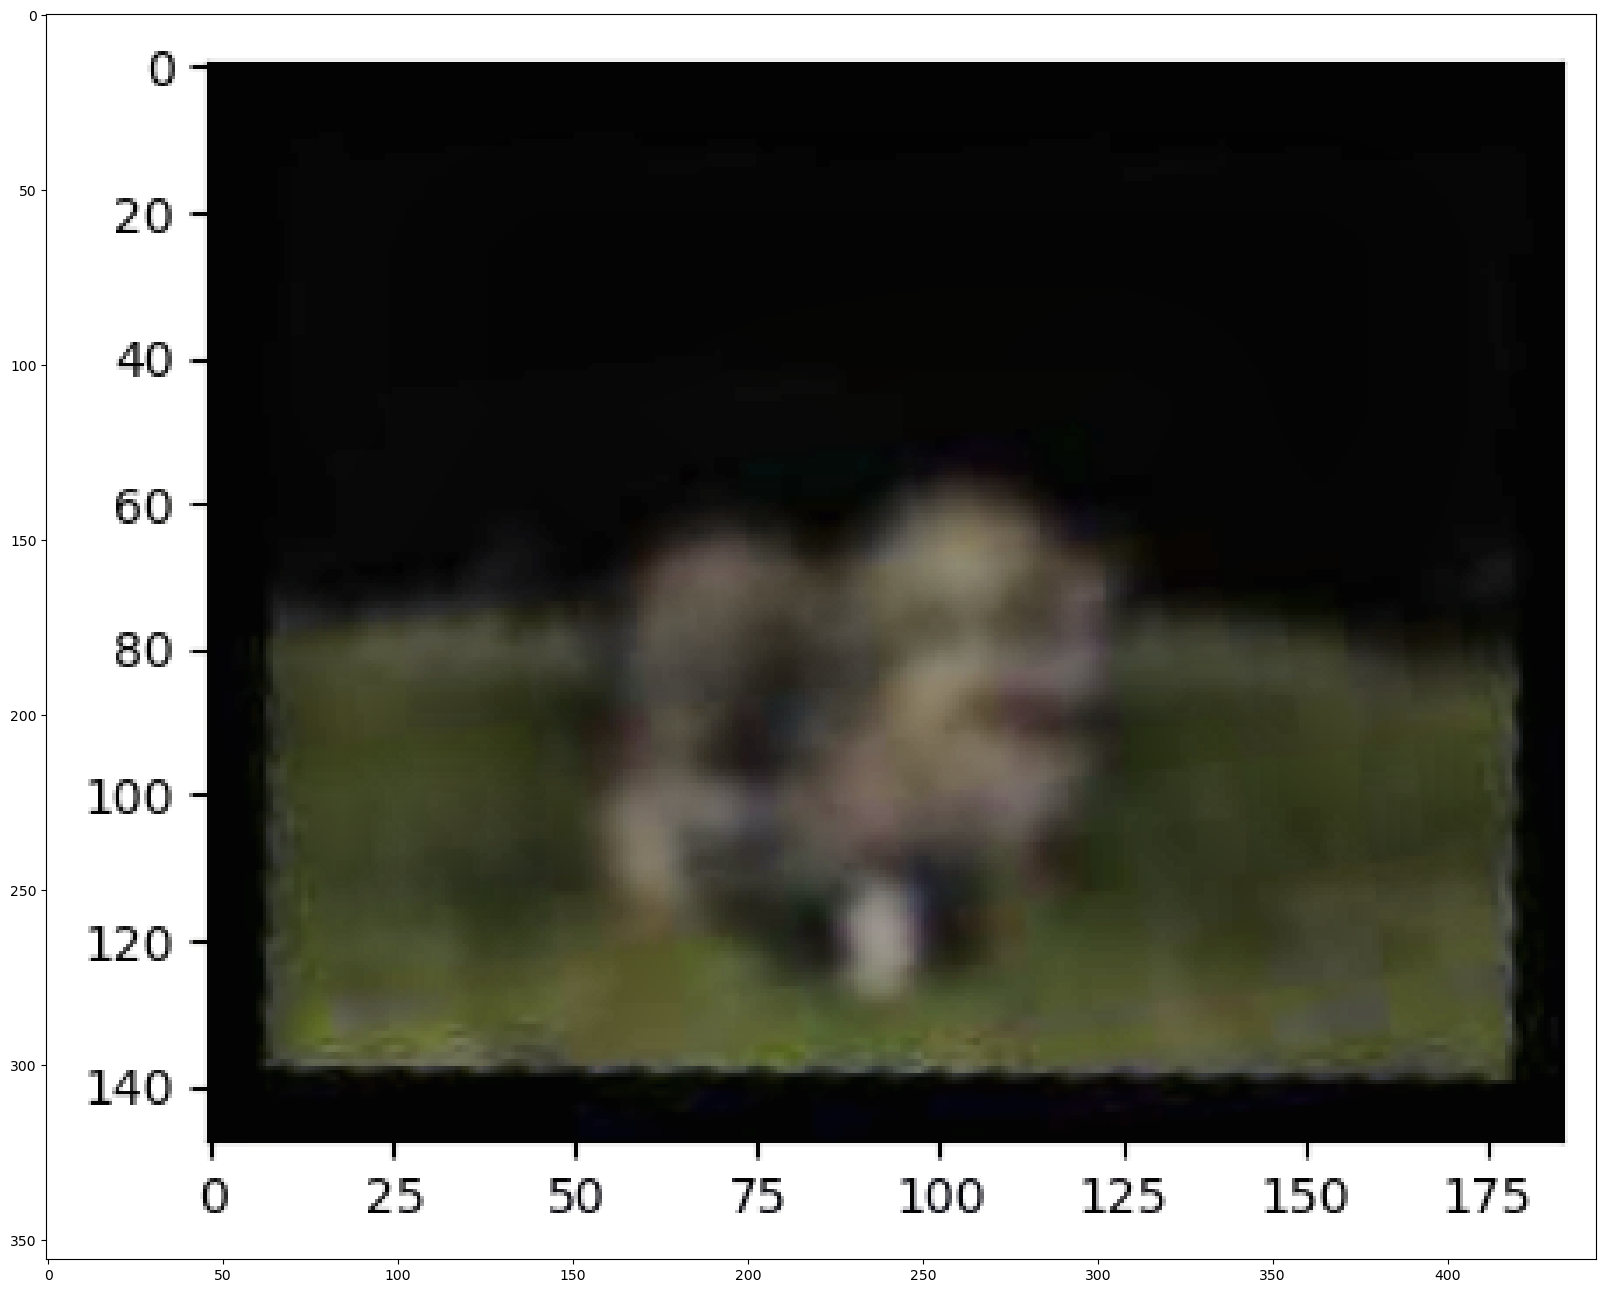

In [31]:
scale_percent = 100  # Процент от изначального размера
width = int(rgb_result_image.shape[1] * scale_percent / 100)
height = int(rgb_result_image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv.resize(rgb_result_image, dim, interpolation=cv.INTER_AREA)
plt.figure(figsize=(20, 20))
plt.imshow(resized_image)